<a href="https://colab.research.google.com/github/zcapkkk/chickenbork/blob/master/Group_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AirBnB Dataset

Below are a few things to get you started with the AirBnB dataset for AIHack! For more information on the table schemata, see [here](https://docs.google.com/document/d/1ezVFDe506zK1CuuNhNmzHEj_iNnL67hDrFzSap9V7S0/edit?usp=sharing).

In [0]:
# Download data - please only run this once
import urllib.request
import zipfile
import os

print("Starting download ...")
url = "https://github.com/aihack20/airbnb_challenge/releases/download/data/data-airbnb.zip"
with urllib.request.urlopen(url) as src:
    with open("tmp_airbnb_data.zip", "wb") as dest:
        dest.write(src.read())
print("Unpacking archive ...")
os.makedirs("airbnb_data", exist_ok=True)
with zipfile.ZipFile("tmp_airbnb_data.zip", compression=zipfile.ZIP_DEFLATED) as zip_f:
    zip_f.extractall("airbnb_data")
print("Done!")

Starting download ...
Unpacking archive ...
Done!


In [0]:
# Run this ONLY IF YOU USE GOOGLE COLAB
google_drive_dir = # YOUR DIRECTORY HERE

try:
    from google.colab import drive
    drive.mount("/content/drive")
    directory = "working_dir"
    if not os.path.exists(directory):
      os.symlink(os.path.join("drive", "My Drive", google_drive_dir), directory)
except ModuleNotFoundError as err:
    print("This only works on Google Colab. Skipping ...")

SyntaxError: ignored

In [0]:
%pip install pandas matplotlib

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.externals import joblib

In [0]:
# Load the data (will take a short while)
calendar = pd.read_csv("airbnb_data/calendar.csv")
demographics = pd.read_csv("airbnb_data/demographics.csv")
econ_state = pd.read_csv("airbnb_data/econ_state.csv")
listings = pd.read_csv("airbnb_data/listings.csv")
real_estate = pd.read_csv("airbnb_data/real_estate.csv")
venues = pd.read_csv("airbnb_data/venues.csv")

## Your Hack ...

In [0]:
calendar.loc[calendar["listing_id"] == 2515].plot(x="date", y="price")

In [0]:
# something simple 

venues

,city,id,latitude,longitude,name,rating,types
0,new york city,b1a0d113cb17d1d85f0e12700dd71f36bddedc54,40.601540,-73.729636,A Bacon Yacht Charter,NaN,"['restaurant', 'food', 'point_of_interest', 'e..."
1,new york city,8799bb8d8ac7c2e1933f92ac1ef0f69a5e0b37c1,40.608921,-73.728256,Mezzanote,NaN,"['restaurant', 'food', 'point_of_interest', 'e..."
2,new york city,f2390680116af4d62e0da6f0432d33e94b9cb0e6,40.616978,-73.730349,Prime Bistro,4.0,"['bar', 'restaurant', 'food', 'point_of_intere..."
3,new york city,e9294eb56025e8eb29b937dc0aca29fd3059b9ab,40.617318,-73.730637,Rita's Ice,4.6,"['restaurant', 'food', 'point_of_interest', 'e..."
4,new york city,5c7b72c7bf9e7bc4f94baf09db1252088087f65d,40.618371,-73.728178,Cho-Sen Island,4.4,"['restaurant', 'food', 'point_of_interest', 'e..."
...,...,...,...,...,...,...,...
267953,washington dc,4efa823d2ba70d32bb1272b31d0e01f98b3f6274,38.934085,-77.057641,"National Zoo, Reptile House",NaN,"['zoo', 'point_of_interest', 'establishment']"
267954,washington dc,9fa01cff0b2b2bba8269bf3932f889d41d2fb1d2,38.952258,-76.952236,Hamilton Pool,3.9,"['amusement_park', 'point_of_interest', 'estab..."
267955,washington dc,49cccff61018d81869b015c2096e8da3319def09,38.888630,-76.973022,Scream City Haunted House,4.3,"['amusement_park', 'point_of_interest', 'estab..."
267956,washington dc,b8453b41c171dd6b9e289d56cbb67bc1a1dddb25,38.903170,-76.988419,Cole Spray Park,NaN,"['amusement_park', 'point_of_interest', 'estab..."


In [0]:
listings

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,119445,7949480,f,40.852054,-73.788680,NYC,City Island Sanctuary relaxing BR & Bath w Par...,99.0,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,16042478,t,40.853491,-73.788607,NYC,WATERFRONT STUDIO APARTMENT,200.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,9815788,1886820,f,40.841144,-73.783052,NYC,Quaint City Island Community.,300.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,6627449,f,40.849775,-73.786609,NYC,Large 1 BDRM in Great location,125.0,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,775.0,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,28811542,5557381,t,40.850024,-73.789328,NYC,Quaint City Island Home,69.0,House,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,350.0,10464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59819,2.0,"{Internet,""Wireless Internet"",""Air conditionin...",0,1.0,Real Bed,1.0,1.0,flexible,silver spring,NaN,84708427,16232278,t,38.993370,-77.036706,dc,Friendly Warm & Clean Atmosphere,42.0,Apartment,9.0,8.0,9.0,8.0,80.0,9.0,Private room,MD,NaN,20910
59820,5.0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",20,1.0,Real Bed,1.0,2.0,flexible,bethesda,NaN,16290768,18560601,f,38.951068,-77.100468,dc,Spacious and modern basement suite,155.0,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,MD,NaN,20816
59821,6.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",13,1.0,Real Bed,1.0,3.0,strict,temple hills,NaN,31818247,17792195,t,38.840824,-76.969784,dc,Master room with parking near Metro,75.0,House,NaN,NaN,NaN,NaN,NaN,NaN,Private room,MD,NaN,20748
59822,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",12,1.0,Real Bed,1.0,1.0,moderate,silver spring,NaN,41071649,18223756,t,38.991331,-77.028024,dc,Modern Condo 5 min from DC,115.0,Condominium,10.0,9.0,10.0,10.0,100.0,10.0,Entire home/apt,MD,NaN,20910


<Figure size 432x288 with 0 Axes>

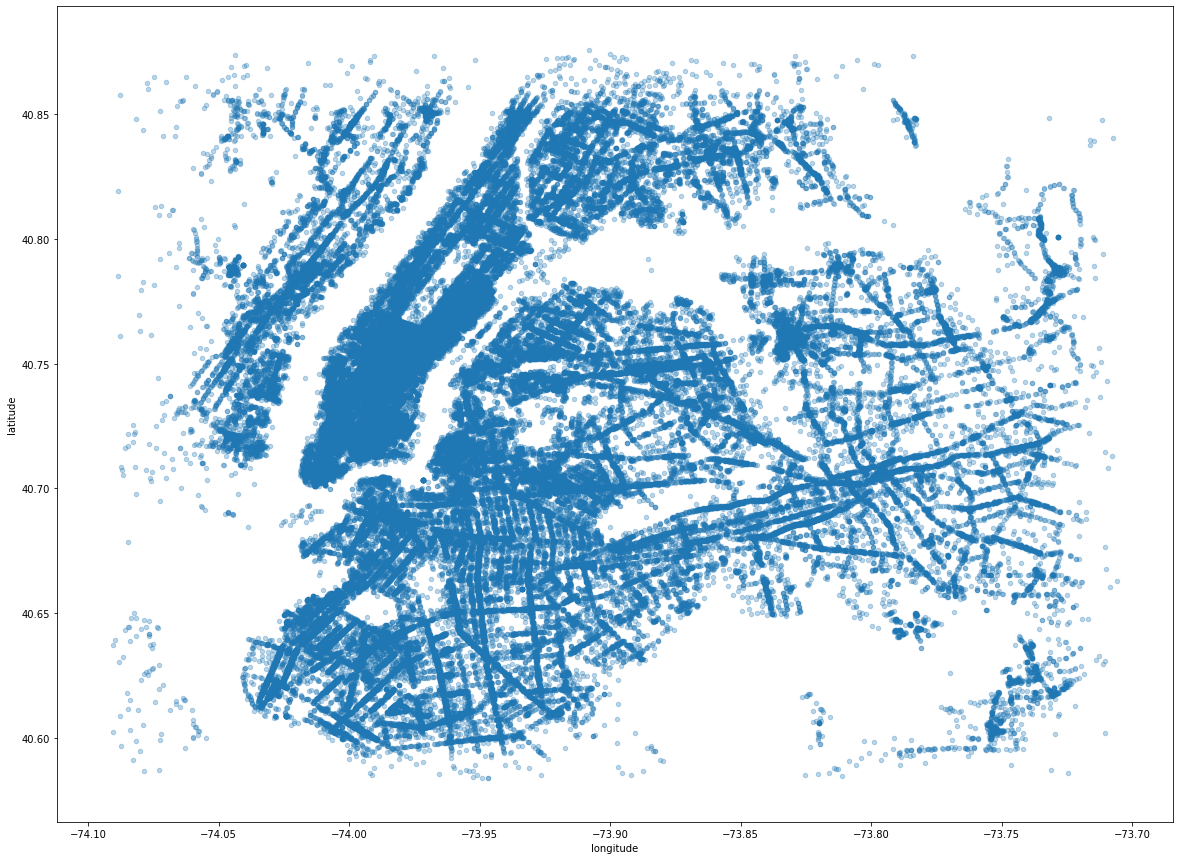

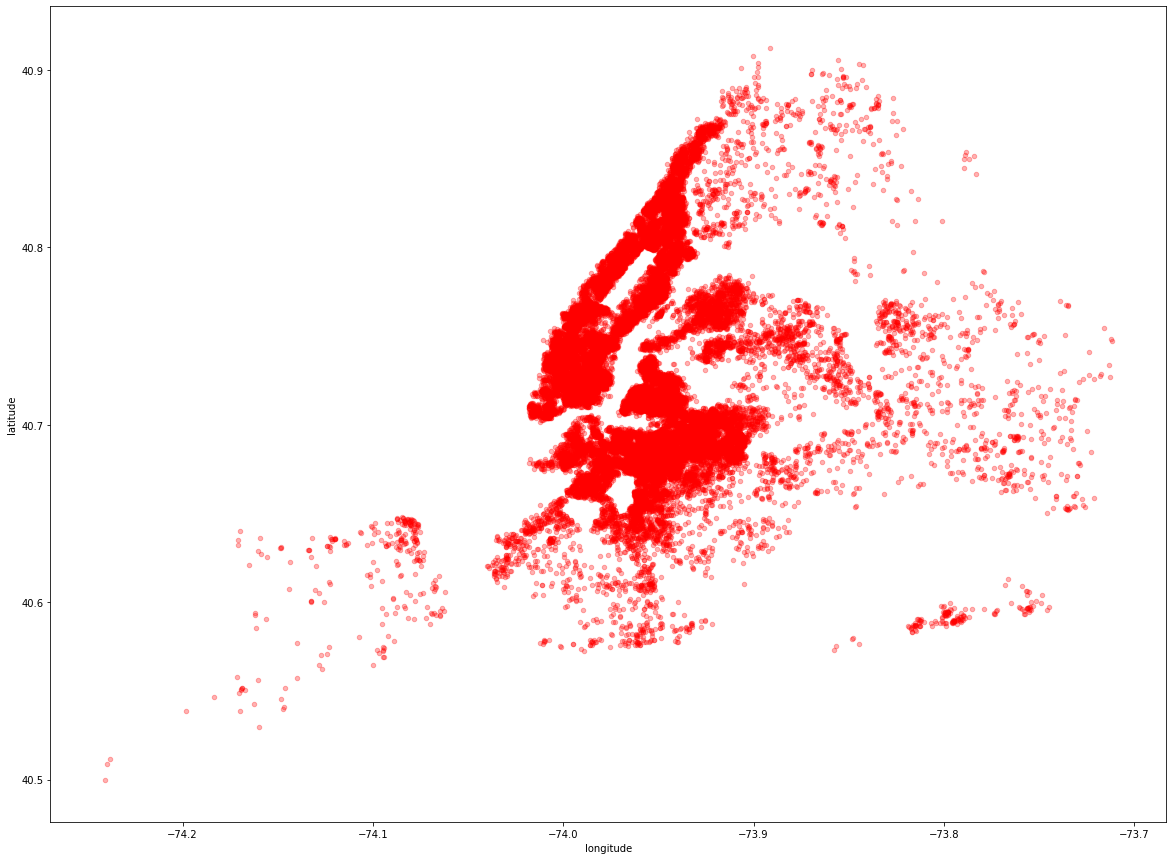

In [0]:
plt.figure()
venues.loc[venues["city"]=="new york city"].plot(kind="scatter", x="longitude", y="latitude", alpha=0.3, figsize=(20,15))
listings.loc[listings["metropolitan"]=="NYC"].plot(kind="scatter", x="longitude", y="latitude",alpha=0.3, color='red', figsize=(20,15))
plt.show()

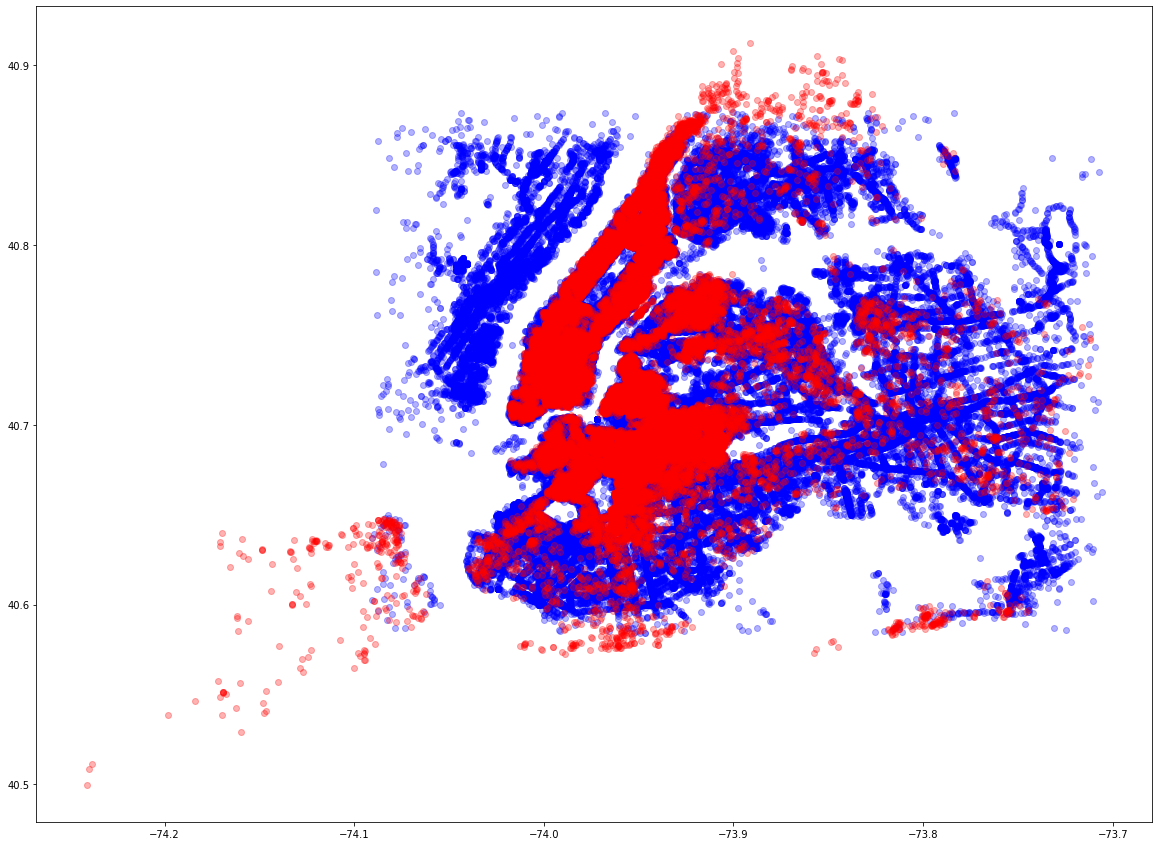

In [0]:
# let us try merging the two
nycvenues = venues.loc[venues["city"]=="new york city"]
nyclistings = listings.loc[listings["metropolitan"]=="NYC"]

nycvenues["rating"].fillna(value=2.5)
nyclistings["review_scores_value"].fillna(value=5)

x1 = nycvenues["longitude"]
y1 = nycvenues["latitude"]
x2 = nyclistings["longitude"]
y2 = nyclistings["latitude"]

plt.figure(figsize=(20,15))
plt.plot(x1,y1, 'bo', alpha=0.3)
plt.plot(x2,y2, 'ro', alpha=0.3)
plt.show()

In [82]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
listings2 = listings[["price","review_scores_value","latitude","longitude", "review_scores_cleanliness", "review_scores_value"]]
listings2 = listings2.dropna(axis=0)

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(listings2, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(train_set["review_scores_value"],train_set["price"])


#predict

lin_predict=lin_reg.predict(train_set["review_scores_value"])

np.sqrt(mean_squared_error(train_set["price"],lin_predict))



172.98975289247423

In [85]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_set["review_scores_value"], train_set["price"])

#predict

forest_predict=forest_reg.predict(train_set["review_scores_value"])


np.sqrt(mean_squared_error(train_set["price"],forest_predict))


172.9640389591125

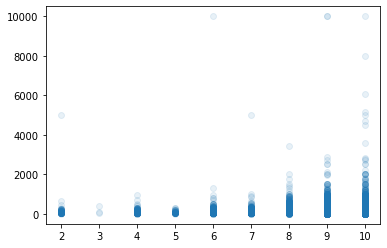

In [98]:
plt.scatter(x=listings["review_scores_value"],y=listings["price"], alpha=0.1)
